# To Do: image filtering

#### Load Libraries and define variables

In [76]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy import signal
filename = "sven.jpg"

#### Define some helper functions

In [77]:
def show_image(title, img, save=True):
    plt.figure(title, figsize=(1.121, 1.5), dpi=1000)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.xticks([]), plt.yticks([]) #rids axes
    plt.savefig(title + ".png", dpi=1000)
    plt.show()

In [78]:
def calculate_gaussian_kernel(size=3, sigma=1):
    kernel = np.zeros((size, size))
    for g_i, k_i in zip(range(int(-size/2), int(size/2) + 1), range(0, size)):
        for g_j, k_j in zip(range(int(-size/2), int(size/2)+1), range(0, size)):
            kernel[k_i][k_j] = np.exp(-(g_i*g_i + g_j*g_j)/(2*sigma*sigma))/(2*np.pi*sigma*sigma)
    
    return kernel

#### Load the image

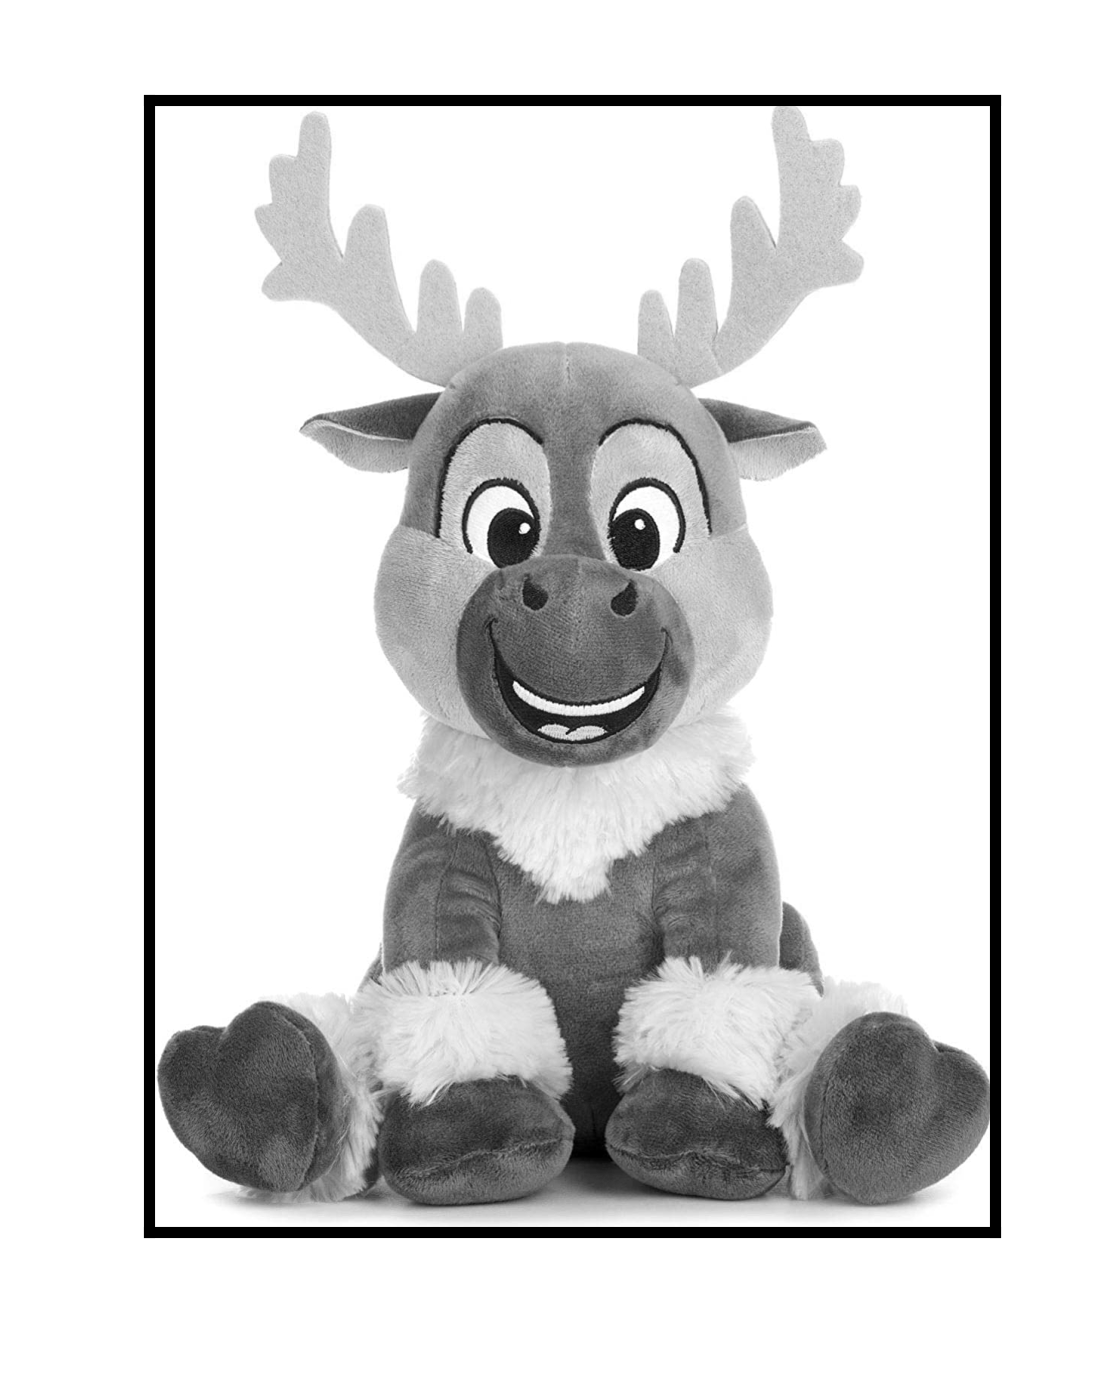

(1500, 1121)

In [79]:
img = cv.imread(filename, 0)
show_image("original", img)
img.shape

#### Gradient operator

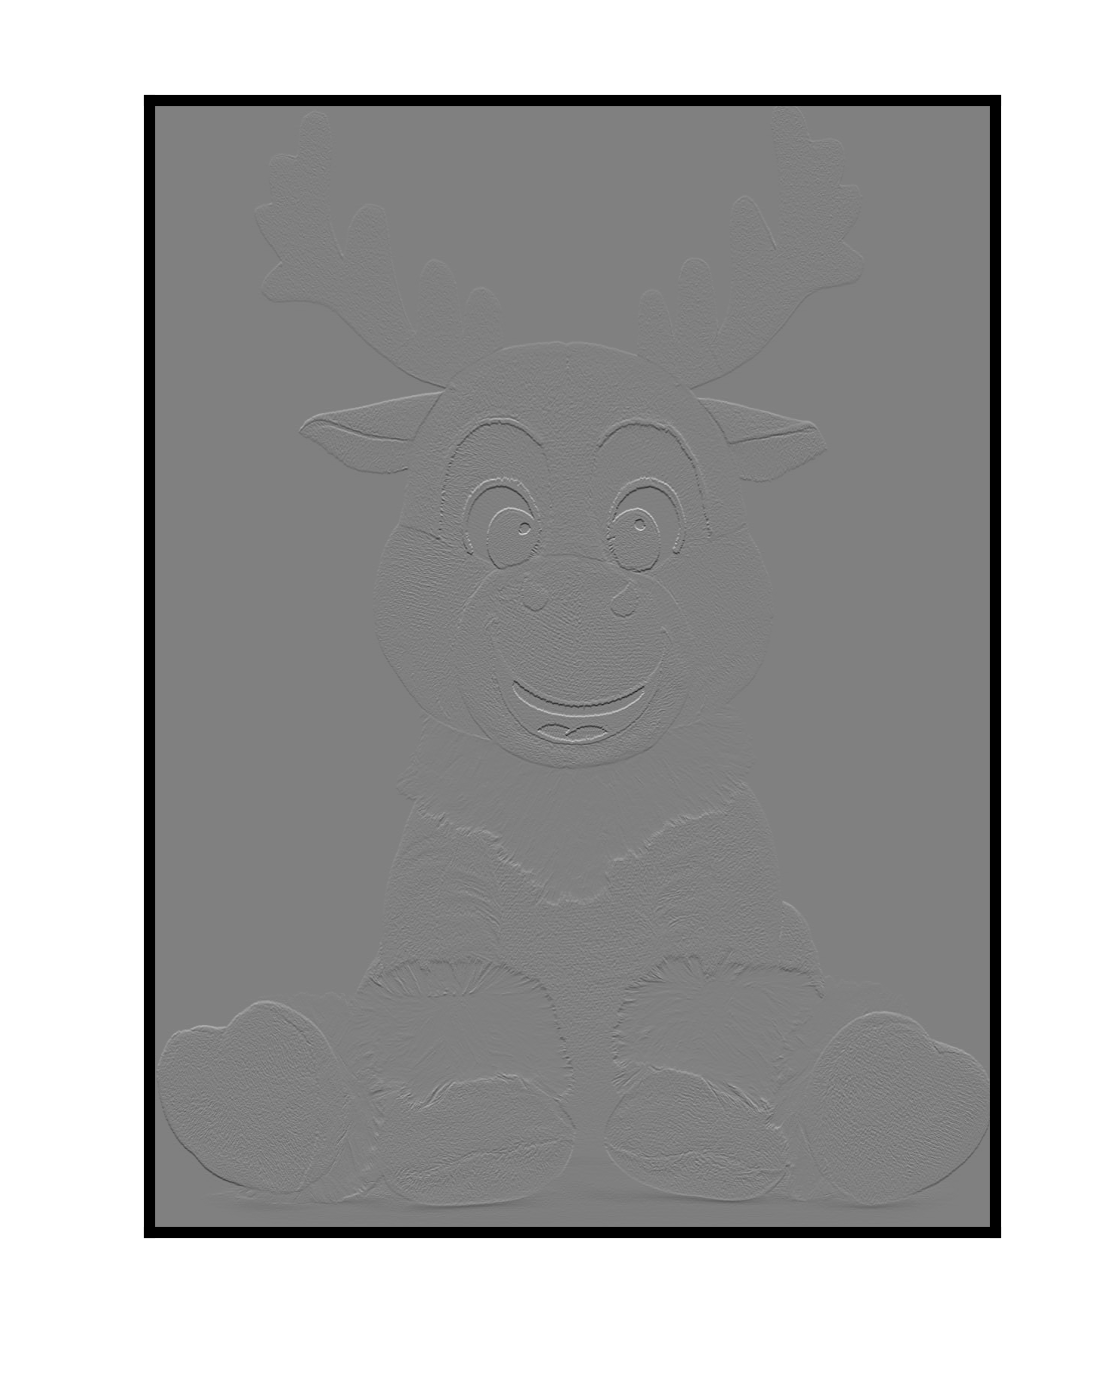

In [80]:
gradient_y_kernel = np.array([[-1],[1]])
gradient_y = signal.convolve2d(img, gradient_y_kernel, boundary='symm', mode='same')
show_image("y_gradient", gradient_y)

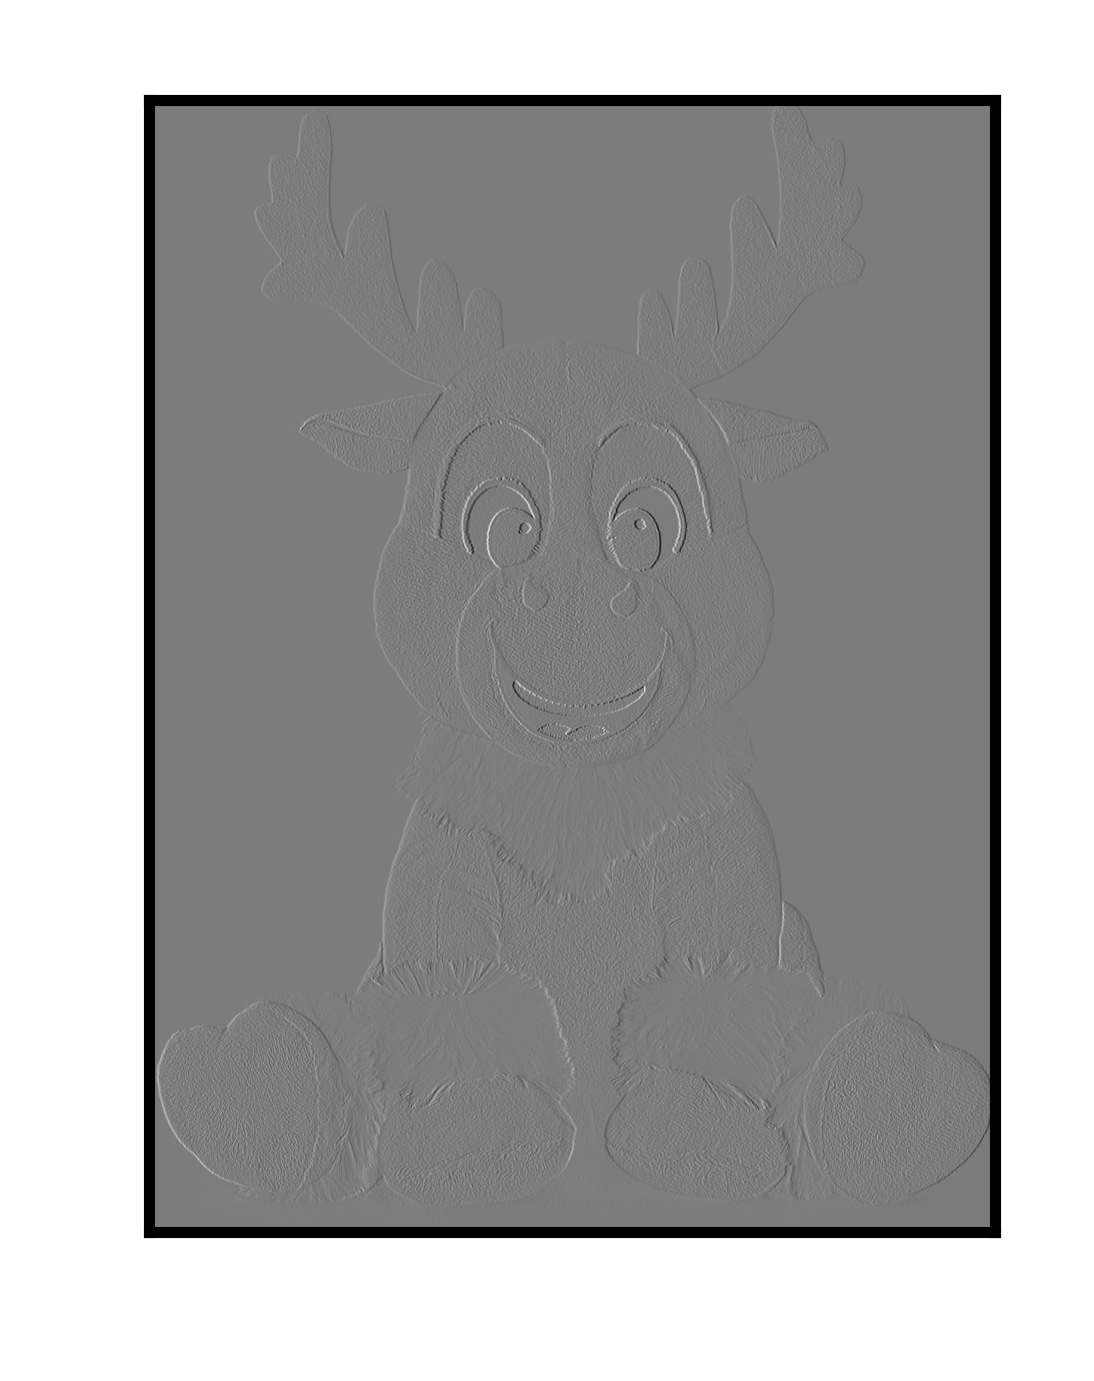

In [81]:
gradient_x_kernel = np.array([[-1, 1]])
gradient_x = signal.convolve2d(img, gradient_x_kernel, boundary='symm', mode='same')
show_image("x_gradient", gradient_x)

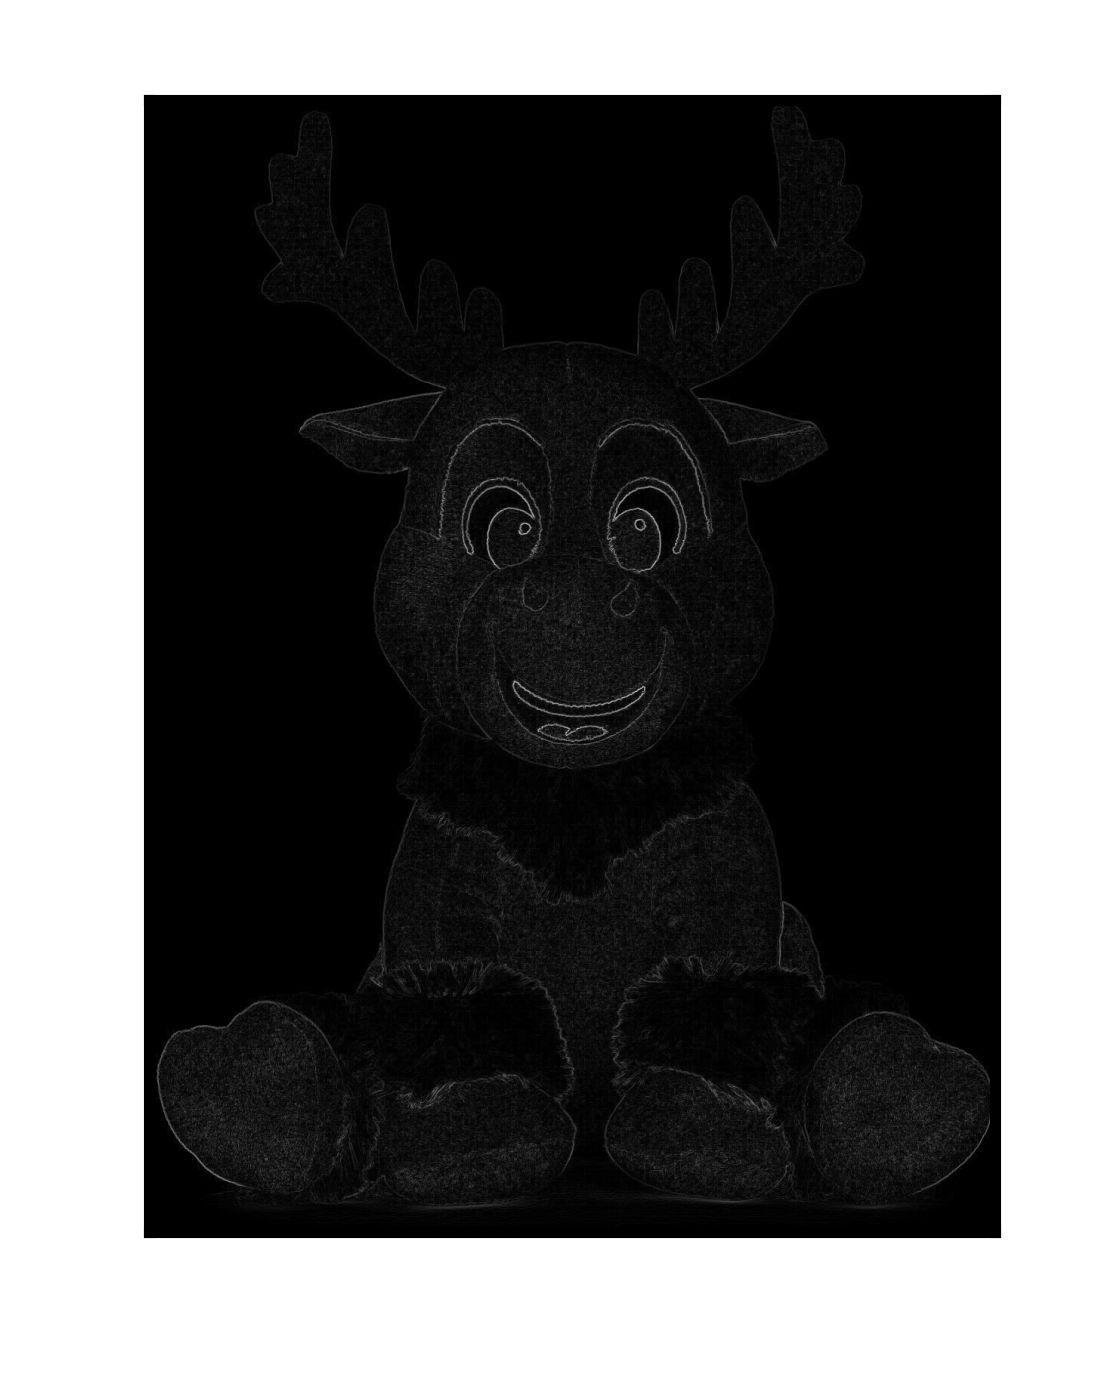

In [82]:
# Define gradient magnitude = sqrt(partial_x_derivate^2 + partial_y_derivate^2)
gradient_magnitude = np.hypot(gradient_x, gradient_y)
show_image("gradient_magnitude", gradient_magnitude)

#### Sobel operator

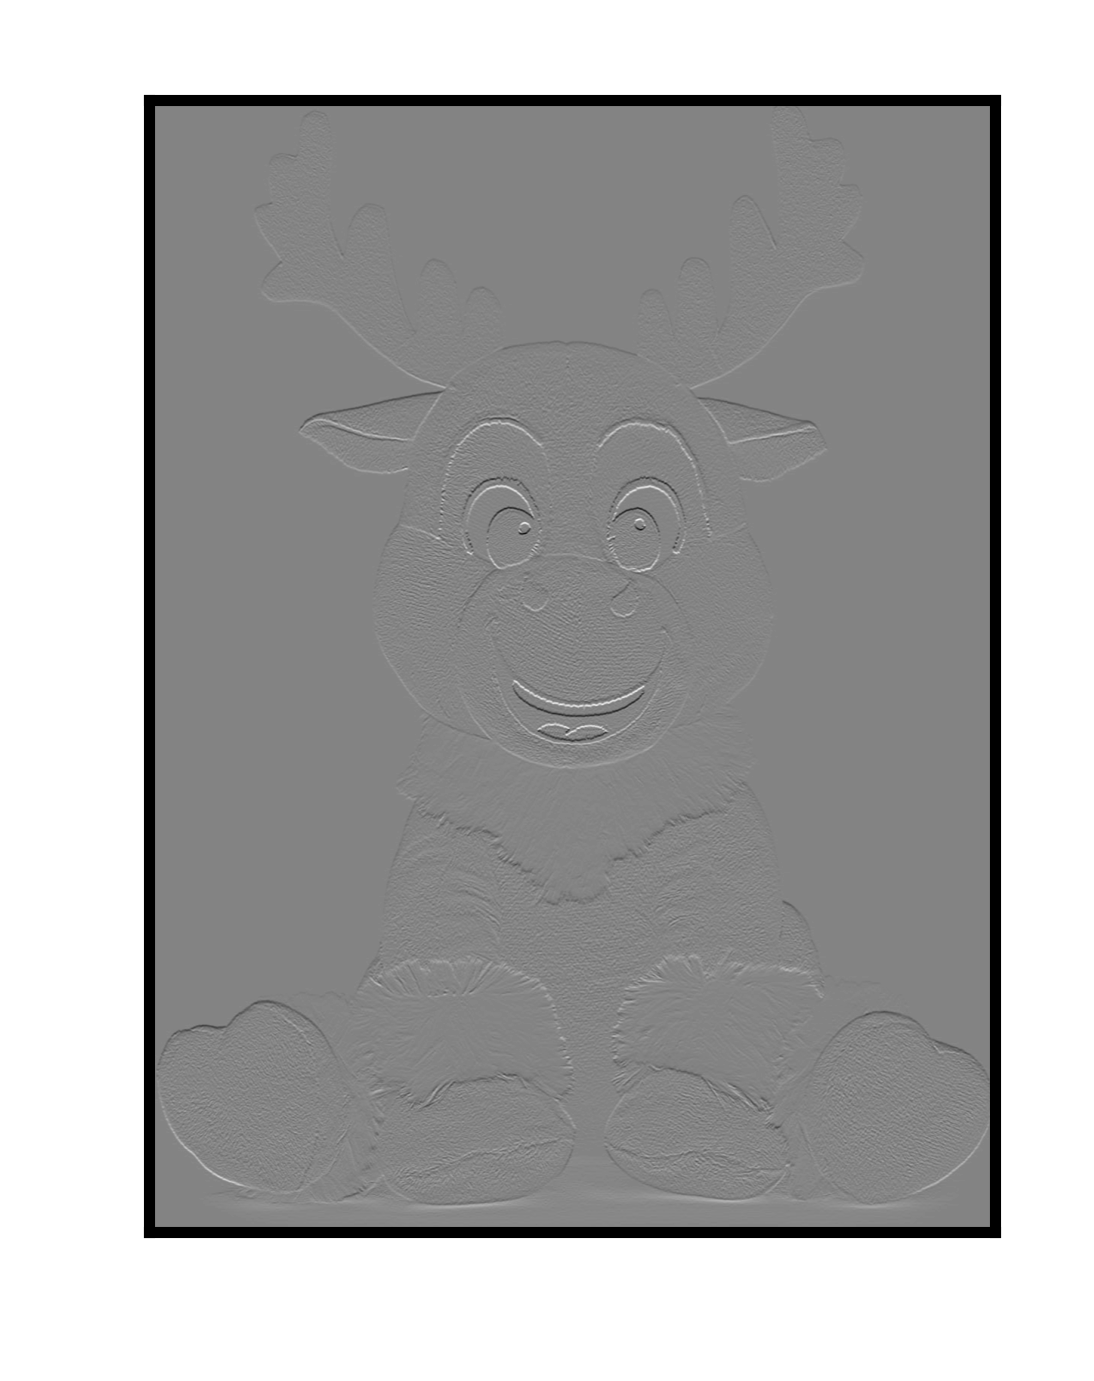

In [83]:
sobel_y_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_y = signal.convolve2d(img, sobel_y_kernel, boundary='symm', mode='same')
show_image("y_sobel", sobel_y)

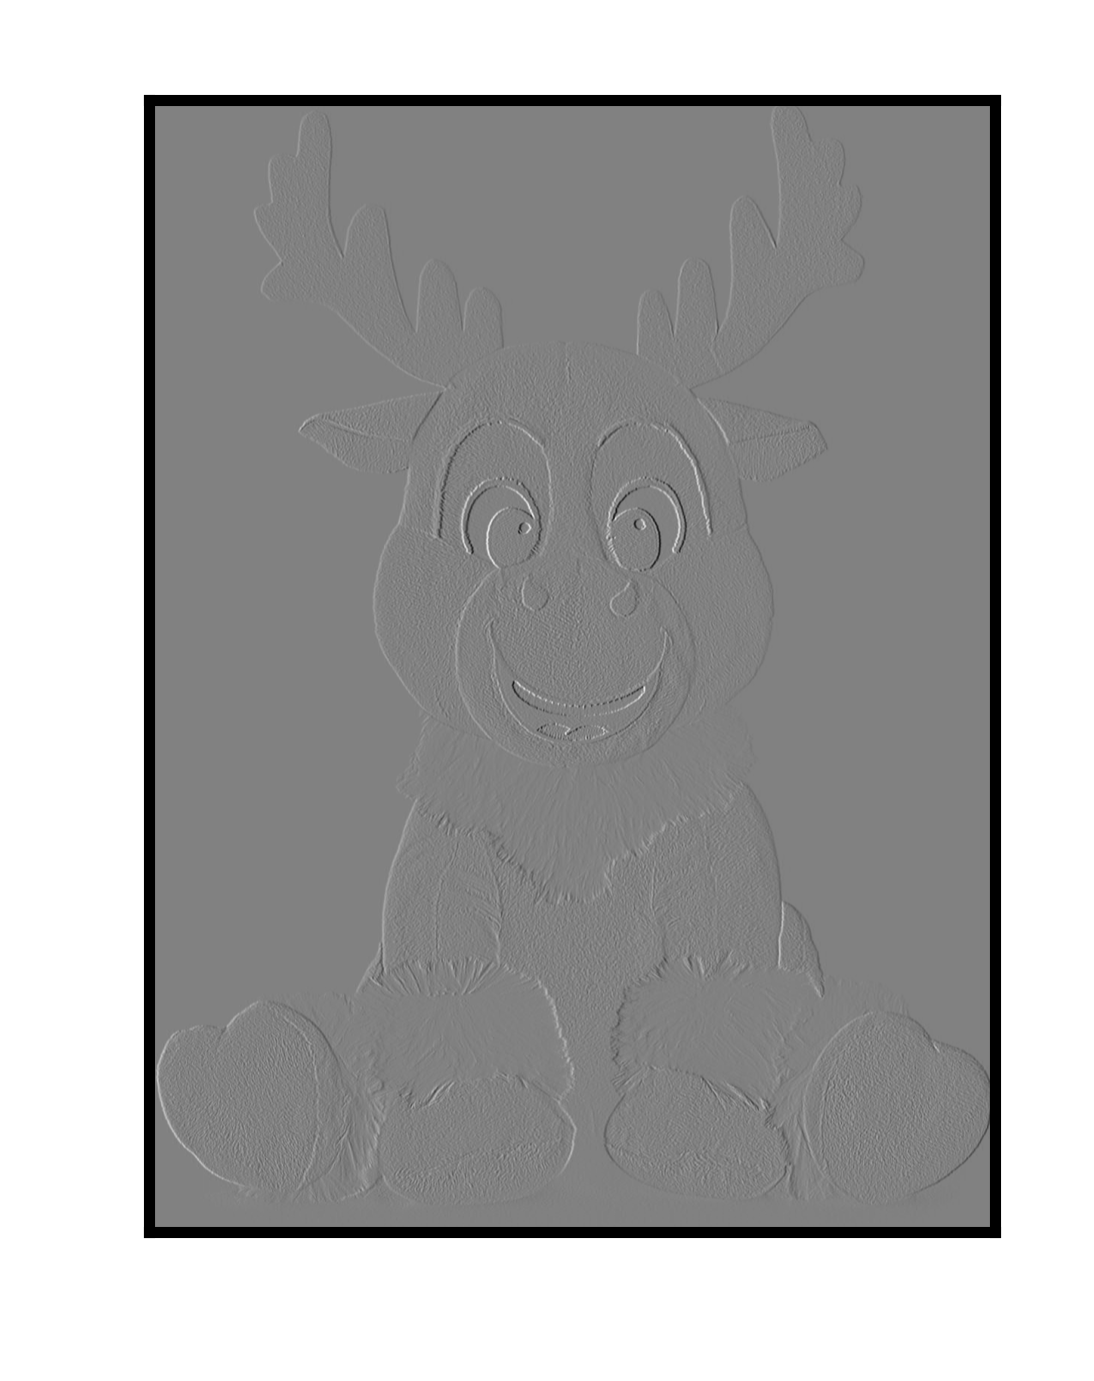

In [84]:
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_x = signal.convolve2d(img, sobel_x_kernel, boundary='symm', mode='same')
show_image("x_sobel", sobel_x)

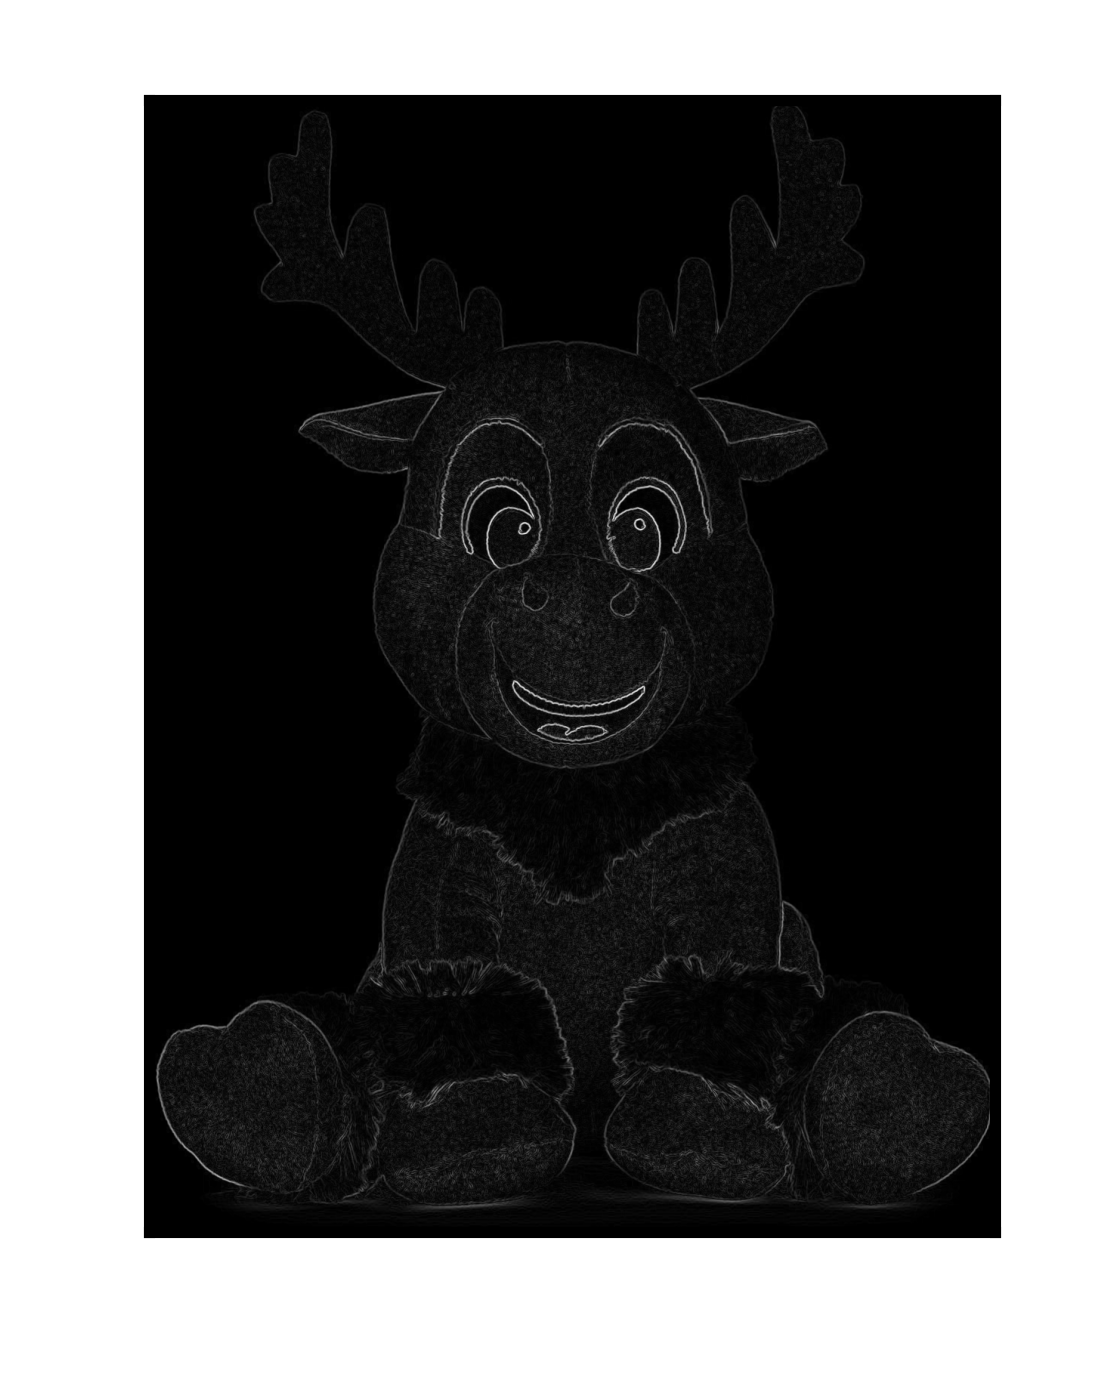

In [85]:
# Define sobel magnitude = sqrt(sobel_x^2 + sobel_y^2)
sobel_magnitude = np.hypot(sobel_x, sobel_y)
show_image("sobel_magnitude", sobel_magnitude)

#### Averaging filter

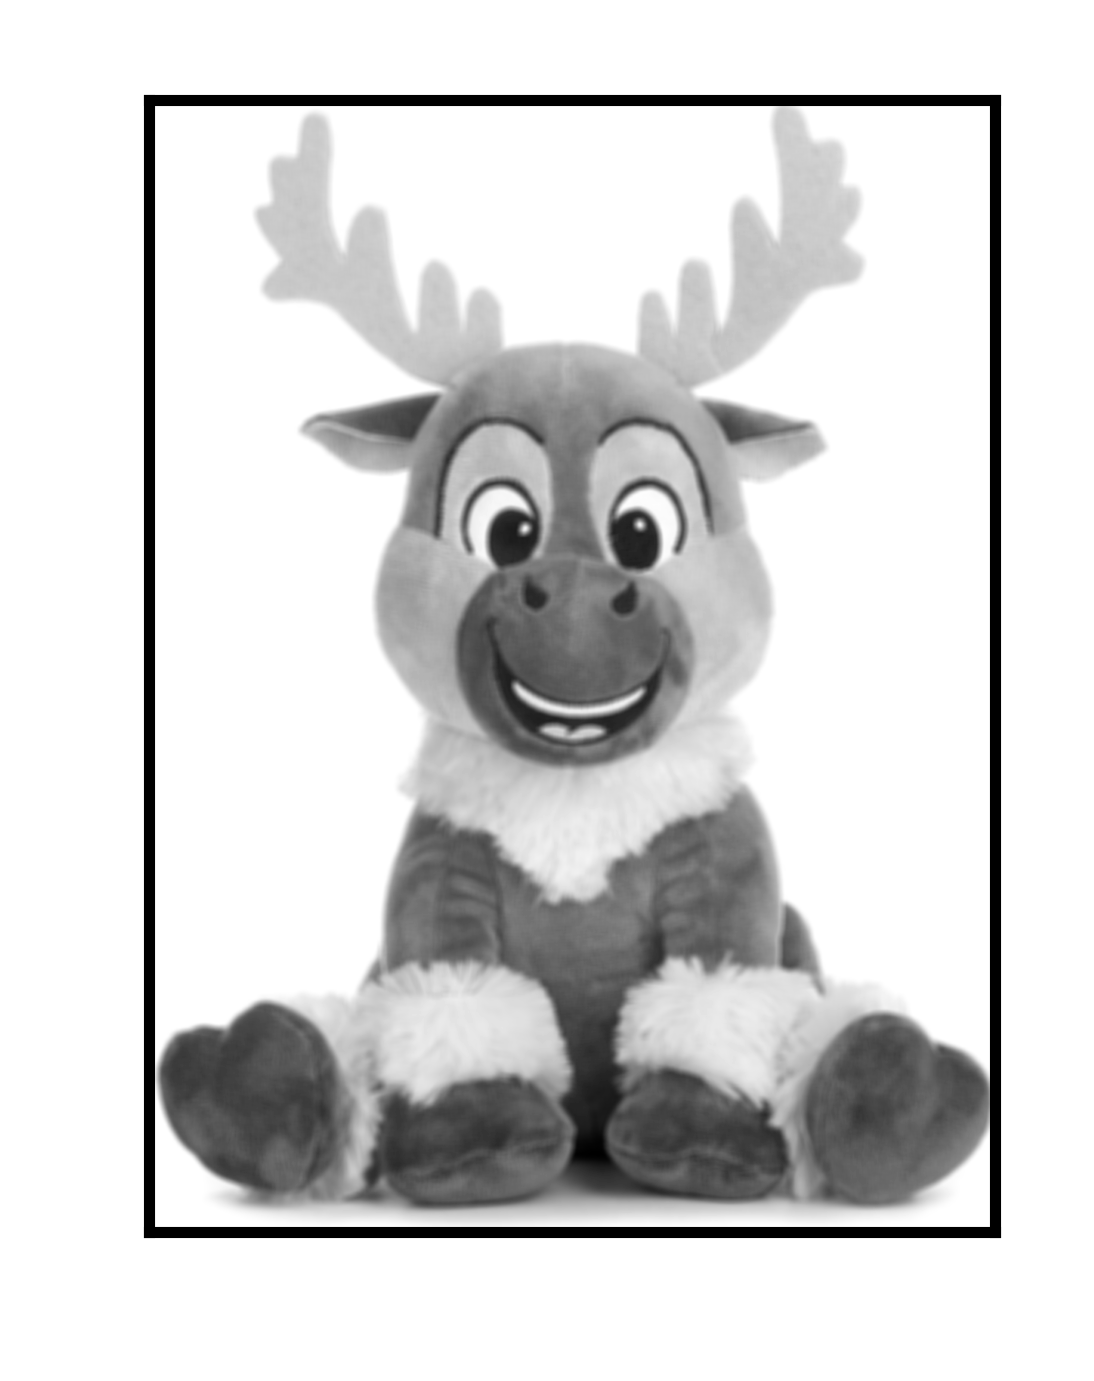

In [86]:
average_kernel = np.ones((10, 10))/100
average = signal.convolve2d(img, average_kernel, boundary='symm', mode='same')
show_image("average", average)

#### Gaussian blur 3x3 with \sigma = 1

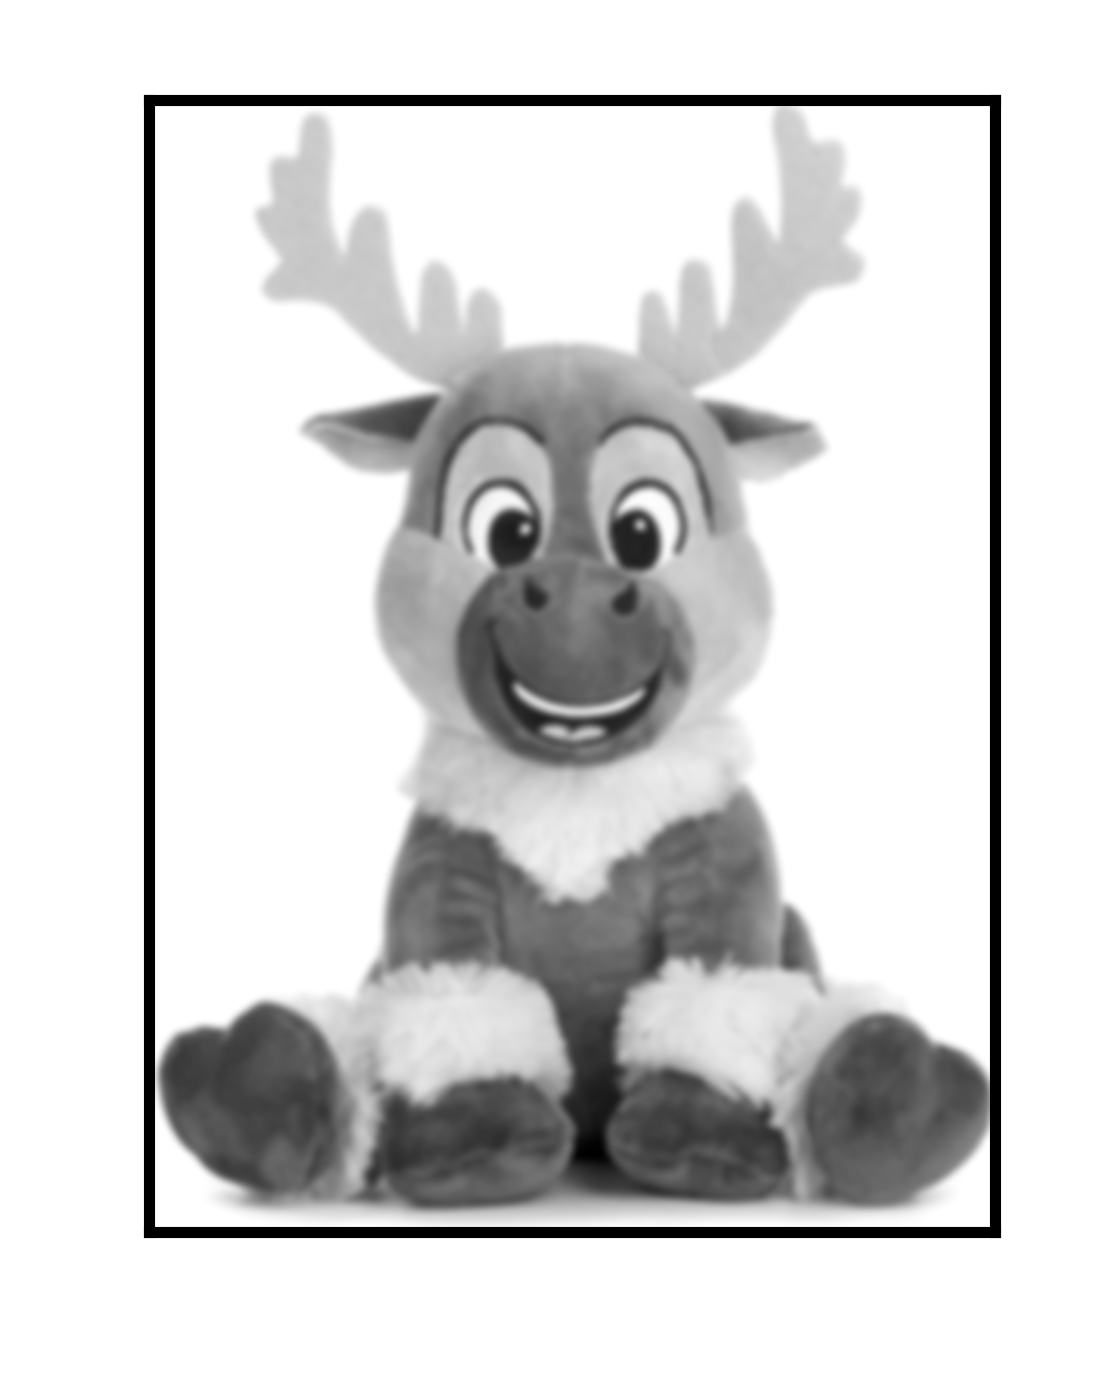

In [87]:
gaussian_kernel = calculate_gaussian_kernel(size=20, sigma=5)
gaussian = signal.convolve2d(img, gaussian_kernel, boundary='symm', mode='same')
show_image("gaussian", gaussian)